In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import torch.nn as nn
import torch.nn.functional as F

In [49]:
class DiscreteSymmetry(Dataset):
   
    def __init__(self, n_samples):
        
        f_min_b, f_max_b = (-1.0 , 1.0)
        (x_min_b, x_max_b) = (0.0, np.pi)
        
        n_samples
    
        f_x = self._custom_norm_t(torch.randn(n_samples, 64), f_min_b, f_max_b)
        x = self._custom_norm_t(torch.randn(n_samples,64), x_min_b, x_max_b)
       
        labels = {'even' : torch.tensor([0 ,1 ]),
                          'odd'  : torch.tensor([1, 0])                
                         }
        
        even = torch.cat((x, f_x, -x, f_x,
                          labels['even'].repeat(n_samples,1)),
             dim=1)
        odd = torch.cat((x, f_x, -x, -f_x,
                           labels['odd'].repeat(n_samples,1)),
             dim=1)
        
        
        self.data = torch.cat((even, odd), dim=0) 
        
    def __getitem__(self, index):
        
        return self.data[index, :-2], self.data[index, -2:]
    
    def __len__(self):
        return self.data.shape[0]
    
    
    def _custom_norm_t(self, t, min_b, max_b, dim=1):
        """ maps tensor to user defined interval"""
        t_min = t.min(dim = dim)[0].unsqueeze(1)
        t_max = t.max(dim = dim)[0].unsqueeze(1)
        t = (t - t_min)  /  (t_max - t_min) * (max_b - min_b) + min_b
        return t
        

In [50]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.block= nn.Sequential(
            OrderedDict([
            ("relu1" , nn.ReLU()),
            ("hidden_layer_1" , nn.Linear(4*64, 1)),
            ("relu2" , nn.ReLU()),    
            ("hidden_layer_2" , nn.Linear(1, 2)),
            ("softmax" , nn.Softmax(dim=1)), 
            ]))
            
        
    def forward(self, x):
        x = self.block(x)
        return x

In [56]:
learning_rate = 0.02


In [57]:
symm = DiscreteSymmetry(10000)

In [58]:
dataloader = DataLoader(dataset=symm, 
                        shuffle=True
                       )

In [ ]:
n_epochs = 4
loss_fn = nn.CrossEntropyLoss()
model = Net()
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    for i, (x, label) in enumerate(dataloader):
        out = model(x)
        loss = loss_fn(out, label)
        # forward path
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {loss}")

Epoch 0, Loss 0.6628568768501282
Epoch 1, Loss 0.6435085535049438


In [55]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

block.hidden_layer_1.weight tensor([[-0.0967, -0.0169, -0.0528, -0.0783, -0.0470, -0.0539, -0.1173, -0.0541,
         -0.0212, -0.0309, -0.0548, -0.0997, -0.0927, -0.0386, -0.0330, -0.0068,
         -0.0386, -0.0364, -0.0426, -0.0608, -0.1029, -0.0667, -0.1131, -0.0156,
         -0.1097, -0.0881, -0.0447, -0.0974, -0.0243, -0.1168, -0.0361, -0.0872,
         -0.0743, -0.0501, -0.0685, -0.0093, -0.0346, -0.0409, -0.0082, -0.0169,
         -0.0432, -0.0759, -0.0915, -0.0079, -0.0118, -0.0571, -0.1114, -0.0483,
         -0.0833, -0.0602, -0.0493, -0.0416, -0.0558, -0.0073, -0.0494, -0.0098,
         -0.0851, -0.0075, -0.0338, -0.0462, -0.0877, -0.0429, -0.0466, -0.0252,
         -0.0343, -0.1169,  0.0500,  0.0086, -0.0193, -0.1121, -0.0599,  0.0315,
         -0.0320, -0.0118, -0.0039, -0.0600, -0.0163, -0.0388, -0.0436,  0.0017,
         -0.0376, -0.0605,  0.0162, -0.0024, -0.0477, -0.0315,  0.0151, -0.0694,
         -0.1208, -0.0077, -0.0329,  0.0585, -0.0938, -0.0861, -0.1189, -0.1118,


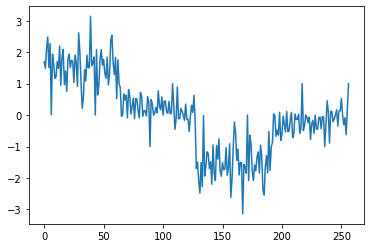

In [48]:
plt.plot(list(dataloader)[0][0].numpy().T)